# Breakout detection
- Twitter Package: https://github.com/twitter/BreakoutDetection
- Breakout detection in python: https://github.com/roland-hochmuth/BreakoutDetection

In [1]:
import breakout_detection
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

/Users/royliao/.pyenv/versions/3.9.1/envs/eda/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
'''
import mock energy data and weather data, the data sets are already cleaned beforehand
the data are collected from year 2020
''' 

### import data sets
energy = pd.read_csv(r'../../../../data_set/Energy.csv')
energy['DateTime'] = pd.to_datetime(energy['DateTime']) 
energy = energy.set_index('DateTime')

In [3]:
### breakout detector define
def Breakout_detection(df, size=30, time_resolution=24, beta=0.0001, degree=1):   
    # size is minimum threshold for the breakout detection 
    edm_multi = breakout_detection.EdmMulti()
    edm_multi.evaluate(df.values.flatten(), min_size=size*time_resolution, beta=beta, degree=degree) 
    break_location = edm_multi.getLoc()  #get the time location of the detected breaks
    print('Breaks locates at: '+str(break_location))
    return break_location

In [7]:
# Make dataframe for number of breaks and plot
def Breakout_plot(df, break_location, time_length=365, time_resolution=24):
    #365 days in a year, time resolution is hourly
    columns = [i for i in range(0, time_length)] 
    index = ['2020'] # year of 2020
    dtype = [(columns, 'ints')]
    values = np.zeros((1,time_length) ,dtype= int)
    # make the dataframe of the breaks
    breakout_heatmap = pd.DataFrame(values,  columns=columns , index = index)
    Max = len(break_location)
    break1 = 0
    x = 0
    while x < Max:
        breaks = break_location[x]
        break2 = int(breaks/time_resolution)
        breakout_heatmap[[i for i in range(break1, break2)]] = x
        break1 = 0 + break2
        x = x + 1
        if x == Max:
            breaks = break_location[x-1]
            break1 = int(breaks/time_resolution)
            break2 =  time_length
            breakout_heatmap[[i for i in range(break1, break2)]] = x
    
    # Set your custom color palette
    colors = ['snow', 'bisque', 'lightcoral', 'firebrick', 'darkred', 'crimson', 'darkviolet', 'indigo' ,'darkslateblue' ,'black']
    cmap = matplotlib.colors.ListedColormap(colors[0:Max+1])
    
    #plot out the breaks
    sns.set_theme(style ='white')
    grid_kws = {"height_ratios":[1, 0.5, 0.1], "width_ratios":[1], "hspace": 0.3}
    fig, (ax, ax2, cbar_ax) = plt.subplots(nrows = 3,figsize=(10,7), gridspec_kw=grid_kws)

    g1 = df.plot(ax=ax, legend = None)
    g1.set_title('Energy Profile')
    g1.set_ylabel('Energy (kWh)',rotation='vertical')
    g1.set_xticklabels([]) # remove the axis label 
    g1.xaxis.set_label_text("")

    g2 = sns.heatmap(breakout_heatmap,ax=ax2,linewidth=0, xticklabels=6, yticklabels=False, vmin=0, vmax=Max, cmap=cmap ,cbar= True, cbar_kws={"orientation": "horizontal"},cbar_ax=cbar_ax)
    g2.set_title('Number of breakouts indicating shifts')
    g2.set_yticklabels([]) # remove the axis label
    size =30
    g2.set_xticks(np.arange(15,time_length,30))
    g2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
    cbar = ax2.collections[0].colorbar
    cbar.set_ticks(np.arange((Max/(Max+1)/2), Max, (Max/(Max+1))))
    cbar.set_ticklabels(np.arange(0,Max+1))
    
    plt.show()
    # Save and remove excess whitespace
    fig.savefig('../../../../figure/breakout_detection.pdf', format='pdf', bbox_inches='tight')
    
    return breakout_heatmap

In [8]:
breaks = Breakout_detection(energy, 60)

Breaks locates at: (2007, 4081, 5849, 7302)


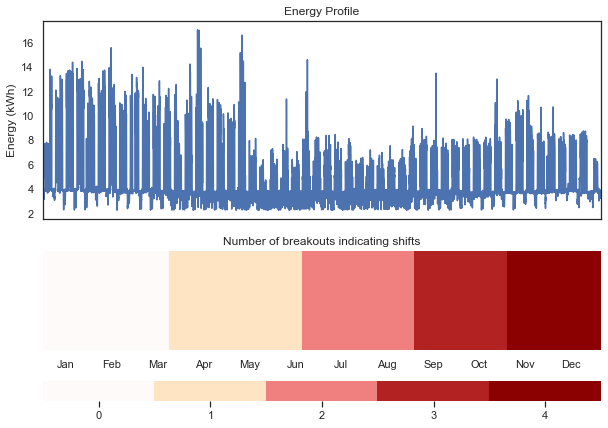

In [9]:
breaks_plot = Breakout_plot(energy,breaks)